# Analyzing Investment Decisions Using Machine Learning

In this project we will be using Machine Learning to process financial data, and use them to make investment decisions. We will mainly focus on whether or not we should buy, sell or hold a particular stock given the information that we have. 

Here we will also learn how to pull out data, process them and then perform some of the most important machine learning algorithms to analyze these data. The data that we will be using are the tickers that are available in the S&P 500. 

Since this is going to be quite a long project, we will not be making all the necessary imports at once, and instead we will be importing libraries along the way as we require them. 

First imports:

In [10]:
import bs4 as bs # Beautiful Soup
import pickle 
import requests

We will first be pulling all ticker symbols of companies available in S&P 500 using BeautifulSoup4, which turns source code from a website into a BeautifulSoup object that can be treated like a typical Python object. 

We will be extracting these ticker symbols from Wikipedia using the request.get() method. Finally, we will specify the exact table that we need to get to the actual ticker symbols that we want to extract.

In [11]:
# Request information from Wikipedia by using the web link
resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

# Extract the text using lxml (toolkit to process html and xml using Python)
soup = bs.BeautifulSoup(resp.text, 'lxml')

# Find and extract the particular table that we want
table = soup.find('table', {'class': 'wikitable sortable'})

For line 8 of the code above, it simply means that we are extracting a table that has a class name of "wikitable sortable", as can be shown below (taken from the wikipedia page source code):

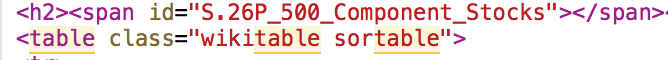

In [12]:
from IPython.display import Image
Image("wikipedia.png")

Now, we will iterate through the rows of the table we just extracted and place only the ticker symbols inside a Python list. In order to save time, we will only take the first 70 companies for analysis.

In [ ]:
# Create an empty Python list 
tickers = []

# Iterate through each row in the table and get only the first 70 companies 
for row in table.findAll('tr')[1:501]:
    # Take only the first column (ticker) and convert to text
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)

# Let's check what we have made
print(tickers)
print("Number of tickers: {}".format(len(tickers)))

In order for us to speed up our process, instead of extracting the ticker symbols every time we run the program, we dump the results that we have made into a pickle. This way we can just load the pickle every time we need the ticker symbols for further processing and analysis.

In [15]:
with open("sp500tickers.pickle", "wb") as f:
    pickle.dump(tickers, f)

Now that we have the pickle saved inside the directory in which we are doing our project, we no longer have to scrape data from wikipedia, and just use the information in the pickle (ticker symbols) to get data from a financial dataset API. 

To do that, we will have to read from the pickle, and then we will create a folder inside the directory we are working in to store individual CSV files of stock data that we download from the API. 

In [ ]:
# Make some additional imports 
import os # To create our folder 
import pandas_datareader.data as web # API to request our stock data 
import datetime as dt # Specify time frame in a form that Python can process 
import pandas as pd

# Open and read the pickle we have just created 
with open("sp500tickers.pickle", "rb") as f: 
    tickers = pickle.load(f)

# Create a directory to store stock data CSV (if it doesn't exist yet)
if not os.path.exists('stock_dfs'):
    os.makedirs('stock_dfs')
    
# Specify time frame of stock data that we want to pull out 
# We will take approximately one year's worth of data 
start = dt.datetime(2017, 1, 1)
end = dt.datetime.now() # most recent date 

# Iterate through list of ticker symbols and then pull data from API
# (if doesn't exist) create a new file inside specified folder 
for ticker in tickers: 
    # Use an if statement in case connection breaks (save our progress)
    if not os.path.exists('stock_dfs/{}_data.csv'.format(ticker)):
        df = web.DataReader(ticker, 'morningstar', start, end)
        # Setting date as our index
        df.reset_index(inplace = True)
        df.set_index("Date", inplace = True)
        df.to_csv('stock_dfs/{}_data.csv'.format(ticker))
    # If data is already present, print on console that it is available
    else:
        print('Already have {}'.format(ticker))

Already have MMM
Already have ABT
Already have ABBV
Already have ACN
Already have ATVI
Already have AYI
Already have ADBE
Already have AMD
Already have AAP
Already have AES
Already have AET
Already have AMG
Already have AFL
Already have A
Already have APD
Already have AKAM
Already have ALK
Already have ALB
Already have ARE
Already have ALXN
Already have ALGN
Already have ALLE
Already have AGN
Already have ADS
Already have LNT
Already have ALL
Already have GOOGL
Already have GOOG
Already have MO
Already have AMZN
Already have AEE
Already have AAL
Already have AEP
Already have AXP
Already have AIG
Already have AMT
Already have AWK
Already have AMP
Already have ABC
Already have AME
Already have AMGN
Already have APH
Already have APC
Already have ADI
Already have ANDV
Already have ANSS
Already have ANTM
Already have AON
Already have AOS
Already have APA
Already have AIV
Already have AAPL
Already have AMAT
Already have APTV
Already have ADM
Already have ARNC
Already have AJG
Already have AI

In [ ]:
with open("sp500tickers.pickle", "rb") as f:
    tickers = pickle.load(f)

main_df = pd.DataFrame()

def compile_data():
    for count, ticker in enumerate(tickers):
        df = pd.read_csv('stock_dfs/{}_data.csv'.format(ticker))
        df.set_index('date', inplace = True)

        # Bonus: Adding columns into each stock df while iterating

        # df['{}_HL_pct_diff'.format(ticker)] = (df['high'] - df['low']) / df['low']
        # df['{}_daily_pct_chng'.format(ticker)] = (df['close'] - df['open']) / df['open']

        # In this project we are only interested in the Adj Close 

        df.rename(columns = {'close': ticker}, inplace = True)
        df.drop(['open', 'high', 'low', 'volume', 'Name'], 1, inplace = True)

        # Build the shared dataframe

        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how = 'outer')

        if count % 10 == 0:
            print(count)

    print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')

compile_data()